# Efficiency Factor からSIOPを求めるスクリプト

In [2]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from bhmie import bhmie
#def Qsca(x,y,m):
#    def integrate_scattering(theta):
#        return (cal_abs(theta,x,y,m)[0] + cal_abs(theta,x,y,m)[0]) * np.sin(np.radians(theta)) #thetaのいち変数とするための関数。
#
#    integrated,err = integrate.quad(integrate_scattering,0,np.pi) #sympyの数値積分メソッドを使用。同時に推定誤差も返される。
#    return integrated/(x**2)import 

In [3]:
from EfficiencyFactor import Functions
func = Functions()
#test
print(func.pi_n(3,30))

4.125000000000001


In [4]:
def PSD(D,j,K=1):
    """
    particle size distribution(PSD) N(D) = K*D^-j
    D: diameter of the particle
    j: parameter1
    K(optional): parameter2
    """
    return K * D ** (-j)

In [18]:
#derive Qbb
def Qbb(x,m):
    nang = 100
    s1,s2,qext,qsca,qback,gsca = bhmie(x,m,300)
    return qback


In [9]:
def Qsca_x(x,m):
    nang = 100
    s1,s2,qext,qsca,qback,gsca = bhmie(x,m,300)
    #Q_backscattering = func.Qbsca(x,y,m)
    return qsca

### check plotting

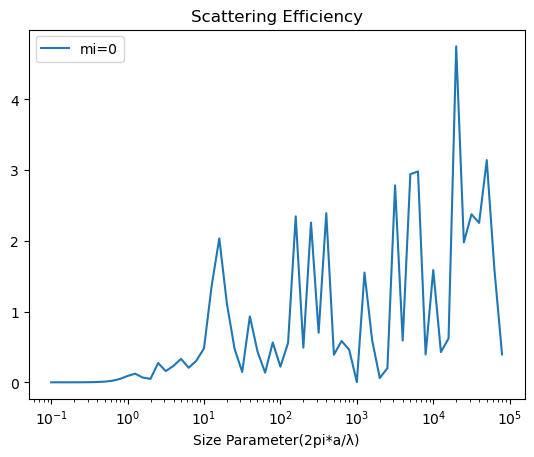

In [19]:
X = [10.**x for x in np.arange(-1,5,0.1)]
fig,ax  = plt.subplots()
for mi in [0,]:#0.001]:#,0.01]:#,0.05]:
    m =1.34-mi*1j
    qsca = [Qbb(x,m) for x in X]


    ax.plot(X,qsca,label=f"mi={mi}")
ax.set_xscale("log");ax.legend()
ax.set_title("Scattering Efficiency")
ax.set_xlabel("Size Parameter(2pi*a/λ)")
#ax.set_ylim(0,15)
plt.show()

In [8]:
#test
Qbb(1e-6,4e-7,1.025-1.0005j)

5.078169441601284

In [17]:
def Cbb(Lambda,m,j,dmin,dmax):
    def numerator(D):
        Q_bb = Qbb(D,Lambda,m)
        ND = PSD(D,j)
        return Q_bb * np.pi * D**2 * ND /4
    
    def denominator(D):
        ND = PSD(D,j)
        return ND
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax)
    print(f"Cbb = {integrated_numerator/intergrated_denominator}")
    return integrated_numerator/intergrated_denominator
        


In [18]:
def G(j,dmin,dmax):
    def numerator(D):
        ND = PSD(D,j)
        return ND * (D **2)
    
    def denominator(D):
        ND = PSD(D,j)
        return ND
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax)
    return integrated_numerator/intergrated_denominator
    

In [19]:
def bbp_SIOP(Lambda,j,m,pho,dmin,dmax):
    Qbb_ave = Cbb(Lambda,m,j,dmin,dmax)/G(j,dmin,dmax)

    def numerator(D):
        ND = PSD(D,j)
        return ND * (D **2)
    
    def denominator(D):
        ND = PSD(D,j)
        return ND * (D **3)
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax) 

    return 3 * Qbb_ave * integrated_numerator / (2 * pho * intergrated_denominator)  
    

### plot

allowing us to calculate a relative number of particles for each size class
between 0.27 μm and 240 μm (i.e., Dmin and Dmax, respectively), \
Despite the differences in the mineralogy observed for the Madeira River between the rising
water stage and the high water stage, the real part (n) of the refraction index varied within a
very limited range, from 1.167 to 1.183
n' (λ) = 0.015λ^-0.004

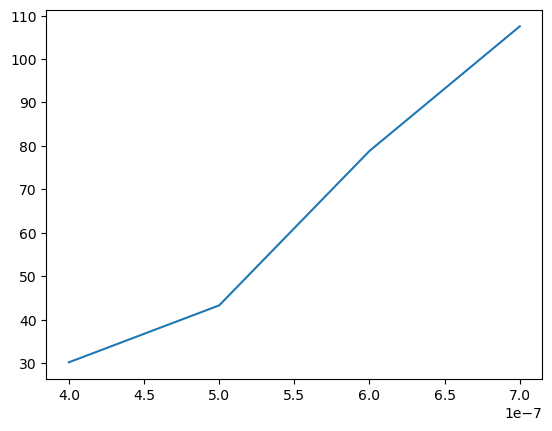

In [20]:
dmin = 0.27 * (1e-6)
dmax = 240 * (1e-6)
j = -4 # -4 is a case for open ocean
pho = 2.5
lambda_min = 4 #* (1e-9)
lambda_max = 8 #* (1e-9)
m = [complex(1.17, 0.015*((l*1e2) ** -0.004))  for l in range(lambda_min,lambda_max)]
Lambda = [l*(1e-7) for l  in range(lambda_min,lambda_max)]

SIOP = [bbp_SIOP(l,j,m,pho,dmin,dmax) for l,m in zip(Lambda,m)]


fig,ax = plt.subplots()
ax.plot(Lambda,SIOP)
plt.show()

In [5]:
#-----------------------------#
#     Set Parameters          #
#-----------------------------#
aw = [2.38,2.36 ] #/m Raymond C. Smith and Karen S. Baker 1981
bw = [0.0006,0.0004]#/m
nw = 1.333 #dimensionless
def n_prime(Lambda):
    return 0.010658*np.exp(-0.007186*Lambda)
m = 1.15
print(m)
dmin = 0.01 #μm
dmax = 500  #μm
pho = 2.65*1e6 #density of Quartz (g/m3)

1.15


In [6]:
def PSD(D,j,K=1):
    """
    particle size distribution(PSD) N(D) = K*D^-j
    D: diameter of the particle
    j: parameter1
    K(optional): parameter2
    """
    return K * (D) ** (-j)
# def Qbb(D,Lambda,m):

#     x = 2 * np.pi * (D *1e-6)/ Lambda
#     s1,s2,qext,qsca,qback,gsca = bhmie(x,m,100)

#     return qback
# def Cbb(Lambda,m,j,dmin,dmax):
#     def numerator(D):
#         Q_bb = Qbb(D,Lambda,m)
#         ND = PSD(D,j)
#         return Q_bb * np.pi * D**2 * ND /4
    
#     def denominator(D):
#         ND = PSD(D,j)
#         return ND
#     print("I came")
#     integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
#     print("You must come with me")
#     intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax)
#     print(f"Cbb = {integrated_numerator/intergrated_denominator}")
#     return integrated_numerator/intergrated_denominator
def Cbb(Lambda,m,j,dmin,dmax):
    def numerator(D):
        x = 2 * np.pi * (D *1e-6)/ (Lambda*1e-9)
        s1,s2,qext,qsca,qback,gsca = bhmie(x,m,100)
        ND = PSD(D,j)
        return qback * np.pi * D**2 * ND /4
    
    def denominator(D):
        ND = PSD(D,j)
        return ND
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    #nd = 100
    #Drange = np.linspace(dmin,dmax,nd)
    #Dseries = [numerator(D) for D in Drange]
    #integrated_numerator =sum(Dseries) *(dmax-dmin)/nd
    print(f"numerator={integrated_numerator}")
    integrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax)
    #integrated_denominator = (dmax**(1-j) - dmin**(1-j))/(1-j)
    print(f"Cbb = {integrated_numerator/integrated_denominator}")
    return integrated_numerator/integrated_denominator
def G(j,dmin,dmax):
    def numerator(D):
        ND = PSD(D,j)
        return ND * (D **2)
    
    def denominator(D):
        ND = PSD(D,j)
        return ND
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    integrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax)
    # if j - 3.0 < 1e-3:
    #     integrated_numerator =  (dmax**(1-j+2) - dmin**(1-j+2))/(1-j+2)
    # else:
    #     integrated_numerator = dmax-dmin
    #integrated_denominator = (dmax**(1-j) - dmin**(1-j))/(1-j)
    return integrated_numerator/integrated_denominator
def bbp_SIOP(Lambda,j,m,pho,dmin,dmax):
    m = m - n_prime(Lambda)*1j
    print(f"WaveLength = {Lambda},refractiveIndex={m}")
    Qbb_ave = Cbb(Lambda,m,j,dmin,dmax)/G(j,dmin,dmax)
    print(f"Qbb_ave={Qbb_ave}")
    def numerator(D):
        ND = PSD(D,j)
        return ND * (D **2)
    
    def denominator(D):
        ND = PSD(D,j)
        return ND * (D **3)
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax) 

    return 3 * Qbb_ave * integrated_numerator / (2 * pho * intergrated_denominator)  


In [7]:
def qback(D,m,Lambda,nang=100):
    m = m-n_prime(Lambda) * 1j
    x = 2 * np.pi * (D *1e-6)/ (Lambda*1e-9)
    #nang = min(10**(len(str(x).split('.')[0])+1),999)
    print(m)
    s1,s2,qext,qsca,qback,gsca = bhmie(x,m,nang)
    #ND = PSD(D,j)
    return qback #* np.pi * D**2 * ND /4

(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.0006016440930127859j)
(1.15-0.00

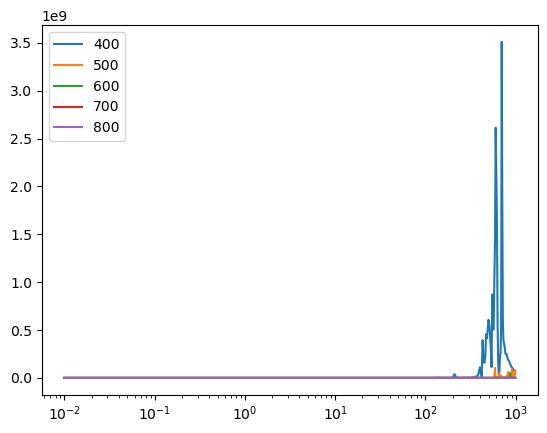

In [8]:
wavelength = np.arange(400,900,100)

fig,ax = plt.subplots()
for Lambda in wavelength:
 
    diameter = np.arange(0.01,1000,10)
    qback_series = [qback(D,m,Lambda) for D in diameter]
    ax.plot(diameter,qback_series,label=Lambda)
ax.legend()
ax.set_xscale('log')
plt.show()


In [34]:
for i in range(1,1000,100):
    print(f"nang={i},qback={qback(500,m,400,nang=i)}")

(1.15-0.0006016440930127859j)
nang=1,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=101,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=201,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=301,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=401,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=501,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=601,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=701,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=801,qback=455888302.4886658
(1.15-0.0006016440930127859j)
nang=901,qback=455888302.4886658
